# Analysis Challenge Assignment (ACA) 4: Social Network Analysis

**by Pooja Addla**

In this ACA 4, I have performed social network analysis on *Marvel Cinematic Universe (MCU)* characters to identify clusters, how each character is connected to the other and notable influencers.


According to the Marvel Cinematic Universe fandom website, "The *MCU* is a media franchise created by *Marvel Studios*, set primarily in a shared universe designated as the reality Earth-199999 within *Marvel's* multiverse system, with some installments also set in adjacent or branching realities."

In the *MCU*, the *Avengers* are a team of superheroes assembled by Nick Fury, the then-director of *S.H.I.E.L.D* which was a former intelligence agency. Meanwhile, "The *Guardians of the Galaxy* are a band of intergalactic outlaws who teamed together to protect the galaxy from planetary threats."

In [62]:
#importing necessary packages

import networkx as nx #this module helps with social network analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

The dataset used, `ACA4_data`, contains an adjancecy matrix I created myself by conducting stringent research of *MCU* cast/characters based on the data available online -- analyzing how many movies^ every character has in common. 

It is important to note that the dataset is based on the *Marvel **Cinematic** Universe* and not the comics, and does not include villains^^, supporting characters^^^ or characters who appear only in post-credit scenes of a movie. The last two *Avengers* movies (*Infinity War* and *Endgame*) were not accounted for while making the adjacency matrix since almost all characters appeared in those. Additionally, characters who only appeared in 1 movie (not including *Infinity War* and *Endgame*) were removed from the dataset regardless of the character's importance in the comics or future movies. Furthermore, *Spiderman*, *Deadpool*, *X-men* and *Eternals* characters were not included as they are different franchises. All data cleaning was performed manually in the `.csv` file prior to importing it.  


^all MCU movies and series released as of 11/30/2021 not including *Infinity War* and *Endgame*.  

^^for the purpose of this ACA4, *Loki* is considered a villain.  

^^^ for the purpose of this ACA4, supporting characters are spouses/romantic partners and anyone without some super-strength or super-power regardless of their importance in the MCU.

In [65]:
#importing the required dataset

SNAdata = pd.read_csv("ACA4_Data.csv", index_col=0) #index_col = 0 sets the first column as row names since the dataset is an adjacency matrix
G = nx.Graph(SNAdata) 

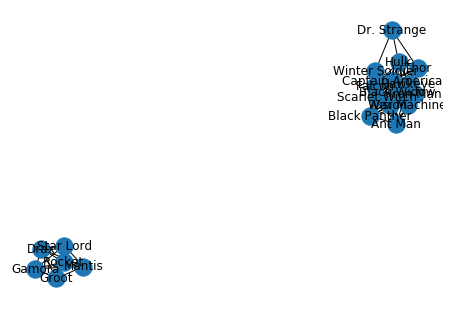

In [64]:
#plotting the network

nx.draw(G, with_labels = True) 

The above graph is just a basic first look. Design changes have been implemented in the following sections. As we can see, there are two clear clusters. From knowledge of the MCU, it is evident that the top cluster with higher number of nodes show the *Avengers* and the bottom cluster show the *Guardians of the Galaxy*.

In [26]:
density = nx.density(G) #density is the measure of how complete the graph is i.e. how many edges are present in the network as compared to the total possible number of edges

print('The edge density is: %.3f' % (density)) 


The edge density is: 0.474


The network is well connectected since we can see 47.4% links among all possible links.

In [27]:
degree = nx.degree(G) #finding the number of degrees i.e. how many edges each node has
                      #output will be a dictionary-like object
degree

DegreeView({'Ant Man': 10, 'Black Panther': 10, 'Black Widow': 12, 'Captain America': 12, 'Dr. Strange': 3, 'Drax': 5, 'Falcon': 12, 'Gamora': 5, 'Groot': 5, 'Hawkeye': 12, 'Hulk': 10, 'Iron Man': 12, 'Mantis': 5, 'Rocket': 5, 'Scarlet Witch': 12, 'Star Lord': 5, 'Thor': 10, 'Vision': 12, 'War Machine': 12, 'Winter Soldier': 11})

In [69]:
pd.DataFrame(degree) #visualizing the above dictionary better by converting it into a pandas dataframe

,0,1
0,Ant Man,10
1,Black Panther,10
2,Black Widow,12
3,Captain America,12
4,Dr. Strange,3
5,Drax,5
6,Falcon,12
7,Gamora,5
8,Groot,5
9,Hawkeye,12


In [29]:
close = nx.closeness_centrality(G) #closeness is how quickly a node can travel to the rest of the graph
                                   #returns a dictionary in a different way as compared to degree()
pd.DataFrame.from_dict(close, orient = 'index') #specifying orientation

,0
Ant Man,0.555921
Black Panther,0.555921
Black Widow,0.635338
Captain America,0.635338
Dr. Strange,0.386728
Drax,0.263158
Falcon,0.635338
Gamora,0.263158
Groot,0.263158
Hawkeye,0.635338


In [30]:
between = nx.betweenness_centrality(G) #betweenness detects the amount of influence a node has over the flow of information in a graph
                                       #finds nodes that serve as a bridge from one part of a graph to another
                                       #calculates unweighted shortest paths between all pairs of nodes in a graph
pd.DataFrame.from_dict(between, orient='index')

,0
Ant Man,0.000000
Black Panther,0.000000
Black Widow,0.004224
Captain America,0.004224
Dr. Strange,0.001300
Drax,0.000000
Falcon,0.004224
Gamora,0.000000
Groot,0.000000
Hawkeye,0.004224


From the above centrality measures and degrees, it's interesting to note that all the primary Avengers characters have the same amount of closeness, betweenness and degrees whereas the guardians of the galaxy characters are similar amongst themselves. There is no one influencer that stands out distinctly.

In [31]:
from networkx.algorithms.community.modularity_max import greedy_modularity_communities #runs the Clauset-Newman-Moore greedy modularity maximization.

#this begins with each node in its own community and joins the pair of communities that most increases modularity until no such pair exists.

mcu = list(greedy_modularity_communities(G)) #putting the result into a list to see how many communities can be detected

print(len(mcu)) #printing the number of communities

2


As seen from the initial rough graph, 2 distinct communities were identified. There seems to be no connection between the 2 communities. We can see the 2 communities printed out below.

In [32]:
#selecting and printing each cluster

avengers = sorted(mcu[0]) 
guardians_of_the_galaxy = sorted(mcu[1])


print(avengers)
print(guardians_of_the_galaxy)

['Ant Man', 'Black Panther', 'Black Widow', 'Captain America', 'Dr. Strange', 'Falcon', 'Hawkeye', 'Hulk', 'Iron Man', 'Scarlet Witch', 'Thor', 'Vision', 'War Machine', 'Winter Soldier']
['Drax', 'Gamora', 'Groot', 'Mantis', 'Rocket', 'Star Lord']


Finally, I am going to implement design changes to the graph by assigning unique colors for the 2 communities, increasing edge thickness, changing node size and increasing the distance between the nodes to get a clearer graph that's not entangled.

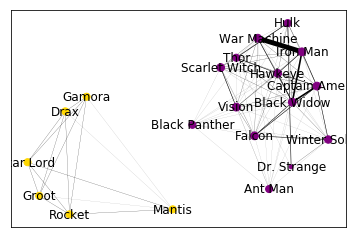

In [76]:
np.random.seed(123)

#obtaining the position of the nodes 

pos = nx.spring_layout(G, k=0.99, iterations=30) #k controls the distance between the nodes and varies between 0 and 1
                                                 #iterations is the no. of times simulated annealing is run
             
#manipulating the thickness of the edges

eWeight = nx.get_edge_attributes(G, 'weight') #obtaining the weight of each edge

#degrees of each community

avengers_degree = {mcu: dict(degree)[mcu] for mcu in avengers}
guardians_of_the_galaxy_degree = {mcu: dict(degree)[mcu] for mcu in guardians_of_the_galaxy}

#print out the nodes with color and size

nx.draw_networkx_nodes(G, pos = pos, nodelist=avengers, node_color='purple', 
                       node_size = [v * 5 for v in avengers_degree.values()], label = True)

nx.draw_networkx_nodes(G, pos = pos, nodelist=guardians_of_the_galaxy, node_color='gold', 
                       node_size = [v * 10 for v in guardians_of_the_galaxy_degree.values()], label = True)

#print out the edges with proper width

nx.draw_networkx_edges(G,pos, width = [3**e/50 for e in eWeight.values()])

#making sure the label is printed

nx.draw_networkx_labels(G, pos=pos)

#show the plot so it supress the other networkx outputs

plt.show()

From the above network visualization, it's clear that the strongest links are between:

*Iron Man* and *War Machine*, *Captain America* and *Black Widow*, *Falcon* and the *Winter Soldier* and finally, *Scarlet Witch* and *Vision*. 

The rest of the avengers are roughly equally connected. Similarly, all the Guardians of the Galaxy characters are equally well connected. There is no apparent link between the Avengers and Guardians of the Galaxy.

While this network is consistent with the canon (defined as "material accepted as officially part of the story), it's crucial to not draw too many inferences from this simple network because many characters were left out for the sake of having clean data. Also, including data from *Infinity War* and *End Game* connect the characters further (and even the 2 clusters above) but also create more messy entanglements.

This visualization can be used to explain the complicated Marvel Cinematic Universe to new fans, serve as a guide to develop fan fiction or even as a reference for future official MCU writers. 